<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/Image_Segmentation_on_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmetation on Oxford Pets Dataset 

In [0]:
# Download the dataset 
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xvf images.tar.gz
!tar -xvf annotations.tar.gz

In [3]:
import os
import numpy as np 
import pandas as pd
# print(os.getcwd())
print(len(os.listdir("images")))
images_name = os.listdir("images")
images_name = [i.split("_")[0] for i in images_name]
print(images_name[0])
print(pd.Series(images_name).value_counts())

7393
havanese
american         400
english          400
Abyssinian       203
Egyptian         200
keeshond         200
Sphynx           200
wheaten          200
Birman           200
samoyed          200
Russian          200
japanese         200
pug              200
Bombay           200
Bengal           200
yorkshire        200
pomeranian       200
saint            200
British          200
beagle           200
shiba            200
miniature        200
Maine            200
boxer            200
leonberger       200
Persian          200
havanese         200
german           200
great            200
Siamese          200
chihuahua        200
Ragdoll          200
basset           200
newfoundland     200
scottish         199
staffordshire    191
dtype: int64


In [5]:
os.listdir("annotations/trimaps/")[:5]

['Persian_46.png',
 '._Birman_119.png',
 'chihuahua_131.png',
 'shiba_inu_141.png',
 '._wheaten_terrier_128.png']

In [7]:
"Persian_46"

'Persian_46'

Original Image Shape -  (375, 500, 3)


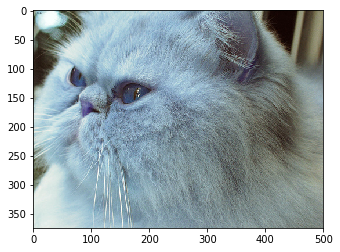

Masked Image Shape -  (375, 500, 3)


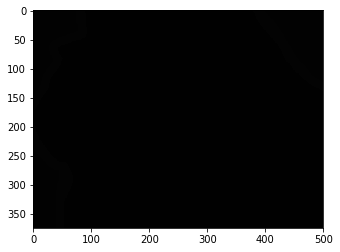

In [11]:
import cv2
import matplotlib.pyplot as plt
original_image = cv2.imread("images/Persian_46.jpg")
masked_image = cv2.imread("annotations/trimaps/Persian_46.png")

plt.imshow(original_image)
print("Original Image Shape - ", original_image.shape)
plt.show()

plt.imshow(masked_image, cmap="gray")
print("Masked Image Shape - ", masked_image.shape)
plt.show()

In [15]:
masked_image.max(), masked_image.min(), np.unique(masked_image)

(3, 1, array([1, 2, 3], dtype=uint8))

Masked Image Shape -  (375, 500, 3)


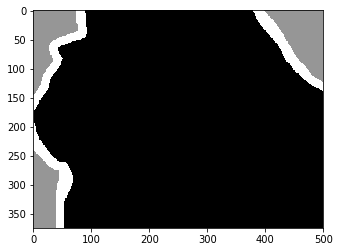

In [20]:
# Masked images have only 3 pixels 1,2,3 so it cant be plotted, we need to
# differentiate them broadly 
masked_image = np.where(masked_image == 2, 150, masked_image)
masked_image = np.where(masked_image == 1, 0, masked_image)
masked_image = np.where(masked_image == 3, 255, masked_image)
plt.imshow(masked_image, cmap="gray")
print("Masked Image Shape - ", masked_image.shape)
plt.show()

In [0]:
# Getting all images
import os
input_dir = 'images/'
target_dir = 'annotations/trimaps/'
img_size = (160, 160)
num_classes = 4
batch_size = 32

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith('.jpg')])
target_img_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith('.png') and not fname.startswith('.')])